In [1]:
import pandas


train_val = pandas.read_csv("../data/vn30/GAS_train.csv")
train_val

,time,open,high,low,close,volume
0,2019-01-02,54.33,54.83,54.33,54.77,417520
1,2019-01-03,54.58,54.89,53.00,53.44,404480
2,2019-01-04,52.87,53.95,51.99,53.32,336550
3,2019-01-07,54.58,55.08,53.95,54.45,255840
4,2019-01-08,54.45,55.97,54.45,55.71,600270
...,...,...,...,...,...,...
1245,2023-12-25,67.98,69.80,67.98,69.61,1057401
1246,2023-12-26,69.80,69.80,68.89,69.52,756305
1247,2023-12-27,69.52,69.80,69.25,69.43,707087
1248,2023-12-28,69.52,69.52,68.80,69.16,767974


In [2]:
train_val.drop("time", axis=1, inplace=True)

In [3]:
from utils import extract_xy


CONTEXT_SIZE = 4
train_val_input, train_val_output = extract_xy(train_val, context_size=CONTEXT_SIZE)
train_val_input.shape, train_val_output.shape

((1246, 20), (1246, 5))

In [4]:
train_val_input

,open-1,open-2,open-3,open-4,high-1,high-2,high-3,high-4,low-1,low-2,low-3,low-4,close-1,close-2,close-3,close-4,volume-1,volume-2,volume-3,volume-4
4,54.58,52.87,54.58,54.33,55.08,53.95,54.89,54.83,53.95,51.99,53.00,54.33,54.45,53.32,53.44,54.77,255840.0,336550.0,404480.0,417520.0
5,54.45,54.58,52.87,54.58,55.97,55.08,53.95,54.89,54.45,53.95,51.99,53.00,55.71,54.45,53.32,53.44,600270.0,255840.0,336550.0,404480.0
6,56.60,54.45,54.58,52.87,57.04,55.97,55.08,53.95,56.16,54.45,53.95,51.99,56.72,55.71,54.45,53.32,515500.0,600270.0,255840.0,336550.0
7,57.35,56.60,54.45,54.58,58.17,57.04,55.97,55.08,57.10,56.16,54.45,53.95,57.61,56.72,55.71,54.45,685580.0,515500.0,600270.0,255840.0
8,57.67,57.35,56.60,54.45,57.86,58.17,57.04,55.97,56.85,57.10,56.16,54.45,57.42,57.61,56.72,55.71,338400.0,685580.0,515500.0,600270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,68.16,68.25,68.70,68.25,68.43,68.34,68.70,68.61,67.61,67.70,68.07,67.52,67.98,67.98,68.43,68.25,617722.0,728928.0,574287.0,887468.0
1246,67.98,68.16,68.25,68.70,69.80,68.43,68.34,68.70,67.98,67.61,67.70,68.07,69.61,67.98,67.98,68.43,1057401.0,617722.0,728928.0,574287.0
1247,69.80,67.98,68.16,68.25,69.80,69.80,68.43,68.34,68.89,67.98,67.61,67.70,69.52,69.61,67.98,67.98,756305.0,1057401.0,617722.0,728928.0
1248,69.52,69.80,67.98,68.16,69.80,69.80,69.80,68.43,69.25,68.89,67.98,67.61,69.43,69.52,69.61,67.98,707087.0,756305.0,1057401.0,617722.0


In [5]:
train_val_output

,open,high,low,close,volume
4,54.45,55.97,54.45,55.71,600270
5,56.60,57.04,56.16,56.72,515500
6,57.35,58.17,57.10,57.61,685580
7,57.67,57.86,56.85,57.42,338400
8,57.29,57.29,56.16,56.47,370320
...,...,...,...,...,...
1245,67.98,69.80,67.98,69.61,1057401
1246,69.80,69.80,68.89,69.52,756305
1247,69.52,69.80,69.25,69.43,707087
1248,69.52,69.52,68.80,69.16,767974


In [6]:
from sklearn.model_selection import train_test_split


train_input, val_input, train_output, val_output = train_test_split(
    train_val_input,
    train_val_output,
    train_size=0.8,
    random_state=42,
    shuffle=True,
)
train_input.shape, val_input.shape, train_output.shape, val_output.shape

((996, 20), (250, 20), (996, 5), (250, 5))

In [7]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
val_input_scaled = scaler.transform(val_input)

In [8]:
from sklearn.linear_model import LinearRegression

from utils import metrics


model = LinearRegression()
model.fit(train_input_scaled, train_output)
metrics(train_output, model.predict(train_input_scaled))

{'rmse': 68448.3491746304,
 'mape': 0.09487794850048412,
 'r2': 0.9085612985967156}

In [9]:
metrics(val_output, model.predict(val_input_scaled))

{'rmse': 80775.18453331727,
 'mape': 0.09474802031968182,
 'r2': 0.8895060740243984}

In [10]:
from typing import List


rmse: List[float] = []
mape: List[float] = []
r2: List[float] = []

for context_size in range(1, 21):
    train_val_input, train_val_output = extract_xy(train_val, context_size=context_size)
    train_input, val_input, train_output, val_output = train_test_split(
        train_val_input,
        train_val_output,
        train_size=0.8,
        random_state=42,
        shuffle=True,
    )

    scaler = StandardScaler()
    train_input_scaled = scaler.fit_transform(train_input)
    val_input_scaled = scaler.transform(val_input)

    model = LinearRegression()
    model.fit(train_input_scaled, train_output)

    m = metrics(val_output, model.predict(val_input_scaled))

    rmse.append(m["rmse"])
    mape.append(m["mape"])
    r2.append(m["r2"])


def sort_metrics(metrics: List[float], *, reverse: bool = False) -> List[float]:
    return sorted(enumerate(metrics, start=1), key=lambda x: x[1], reverse=reverse)


print(sort_metrics(rmse, reverse=False))
print(sort_metrics(mape, reverse=False))
print(sort_metrics(r2, reverse=True))

[(8, 59085.271132485985), (9, 61825.981388761444), (19, 66633.47537803923), (14, 68359.14094636371), (20, 70227.62677411232), (5, 70475.93697525225), (1, 70779.4065387776), (15, 71081.91192130644), (2, 72646.02178746648), (3, 74040.5867511165), (7, 74497.09769604688), (12, 74609.25462875927), (4, 80775.18453331727), (10, 80889.83570813689), (18, 81064.65813927981), (17, 82199.00802838393), (11, 83364.3805553492), (6, 84161.7441218679), (13, 84795.34021326844), (16, 84967.64652442688)]
[(7, 0.08719125679983177), (8, 0.08889507936585077), (10, 0.09131291319850389), (9, 0.09205836189790564), (5, 0.09365081046602775), (4, 0.09474802031968182), (15, 0.09491942629856402), (14, 0.09764152645785149), (12, 0.09769796325915664), (3, 0.09938231544944812), (18, 0.1007109359230294), (16, 0.10267380637864924), (11, 0.10269682512553555), (6, 0.10337776509927263), (17, 0.10432912930492155), (19, 0.10506321970170089), (2, 0.10752904305451627), (13, 0.1108291432010012), (20, 0.11091729162717026), (1, 0.

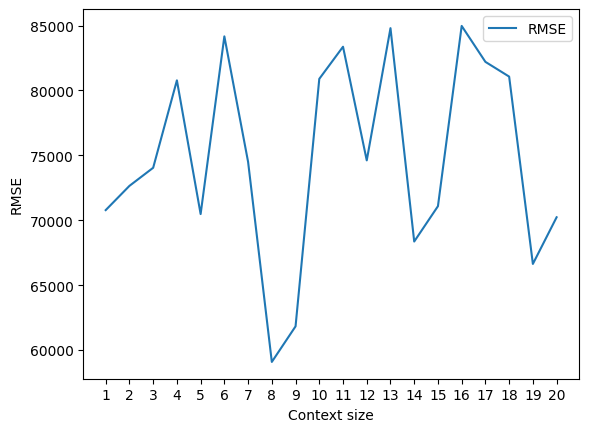

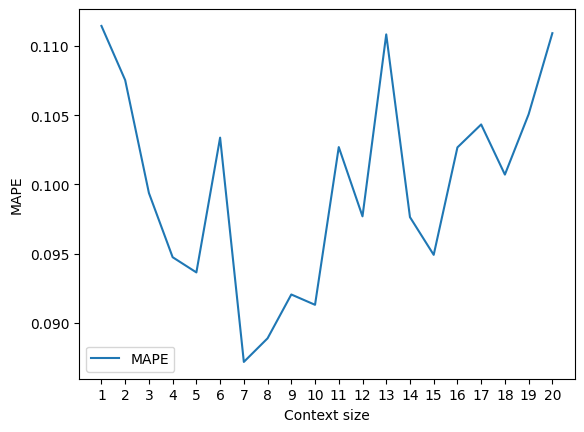

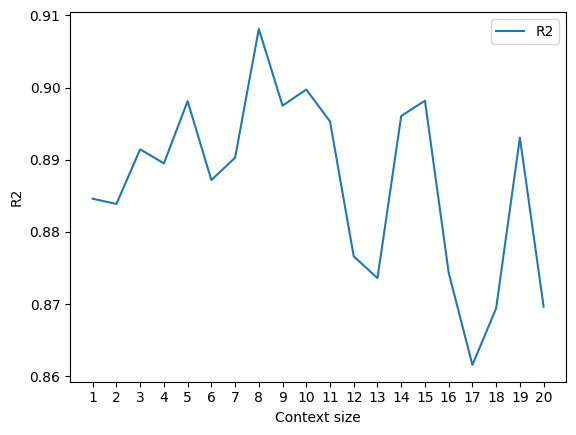

In [11]:
from utils import plot_context_size_metrics


plot_context_size_metrics(rmse, label="RMSE")
plot_context_size_metrics(mape, label="MAPE")
plot_context_size_metrics(r2, label="R2")

In [12]:
CONTEXT_SIZE = 8
train_val_input, train_val_output = extract_xy(train_val, context_size=CONTEXT_SIZE)
train_input, val_input, train_output, val_output = train_test_split(
    train_val_input,
    train_val_output,
    train_size=0.8,
    random_state=42,
    shuffle=True,
)

scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
val_input_scaled = scaler.transform(val_input)

model = LinearRegression()
model.fit(train_input_scaled, train_output)
metrics(val_output, model.predict(val_input_scaled))

{'rmse': 59085.271132485985,
 'mape': 0.08889507936585077,
 'r2': 0.9081379365567624}

In [13]:
test = pandas.read_csv("../data/vn30/GAS_test.csv")
test.drop("time", axis=1, inplace=True)
test_input, test_output = extract_xy(test, context_size=CONTEXT_SIZE)

test_input_scaled = scaler.transform(test_input)
metrics(test_output, model.predict(test_input_scaled))

{'rmse': 107943.72361904134,
 'mape': 0.09865581808978587,
 'r2': 0.8392063413936721}